In [1]:
import torch
from torch import nn

In [2]:
import matplotlib.pyplot as plt
torch.manual_seed(3)

# make data

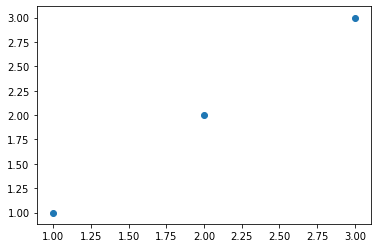

In [3]:
x = torch.Tensor([[1],[2],[3]])
y = torch.Tensor([[1],[2],[3]])

plt.scatter(x.numpy(), y.numpy())

# Naive Model

## Define Linear Model

In [4]:
W = torch.rand(1,1)
W

tensor([[0.0043]])

In [5]:
x.mm(W)

tensor([[0.0043],
        [0.0085],
        [0.0128]])

## Define Cost Function

In [6]:
cost_func = nn.MSELoss()

cost_func

MSELoss()

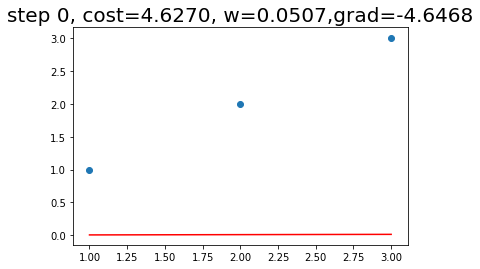

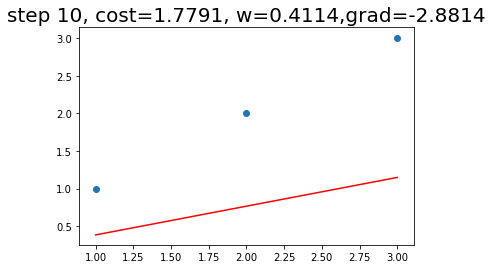

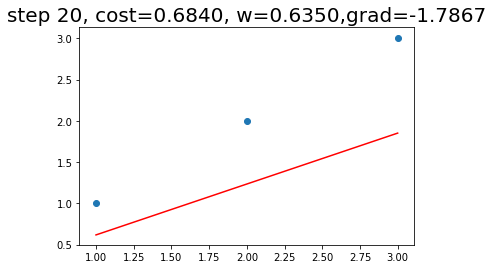

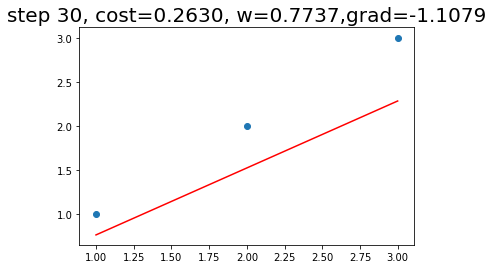

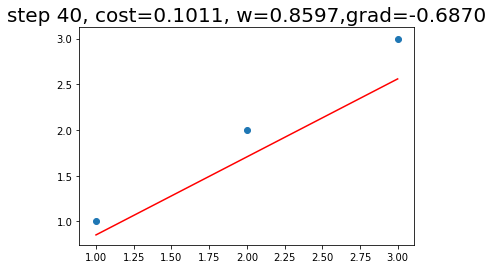

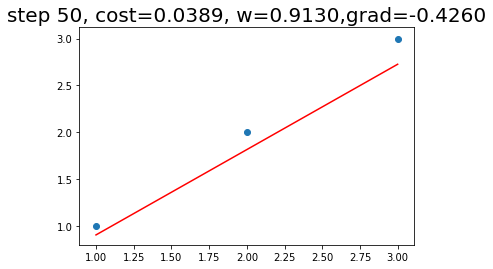

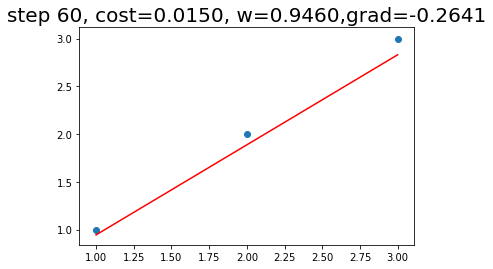

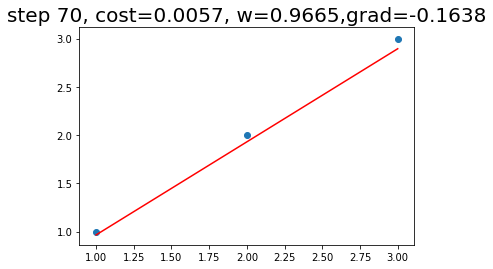

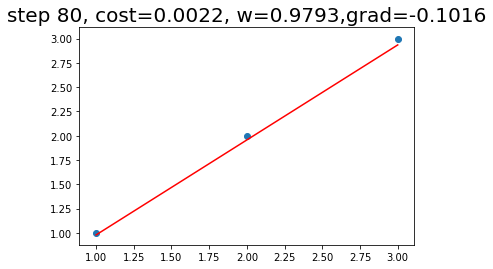

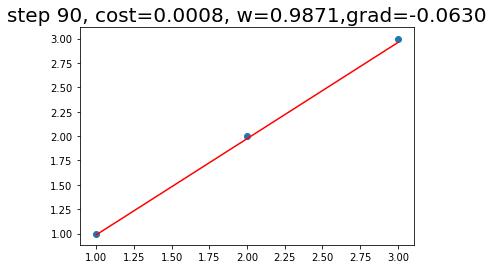

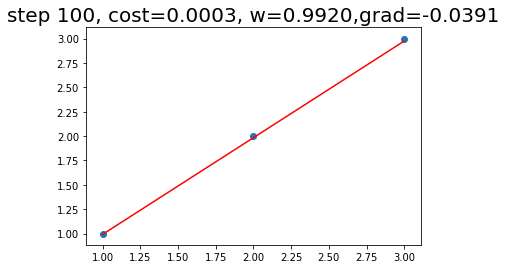

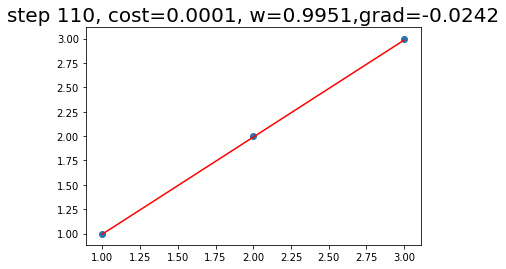

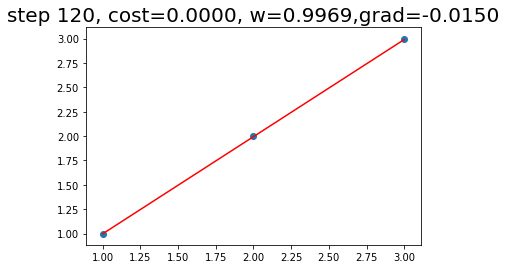

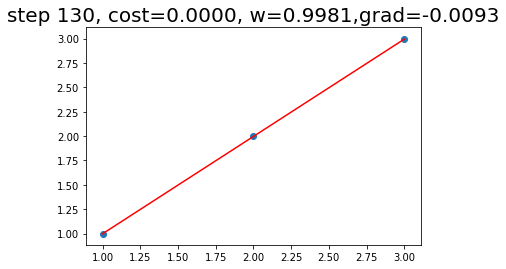

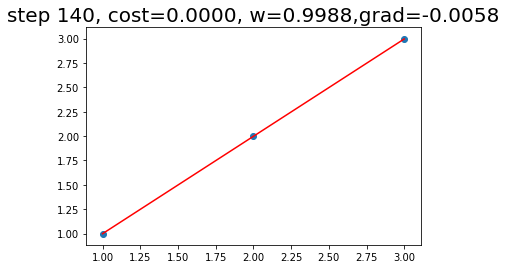

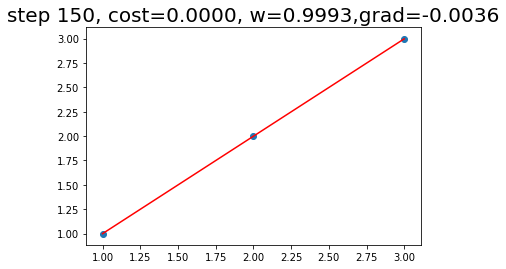

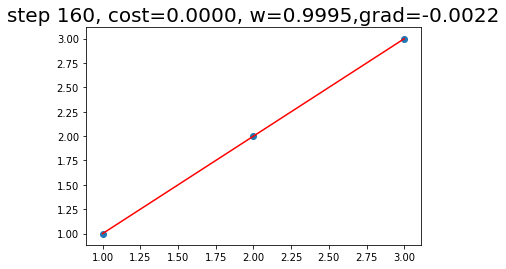

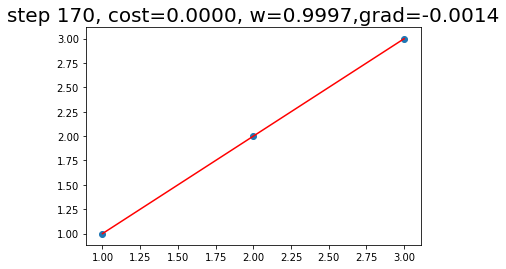

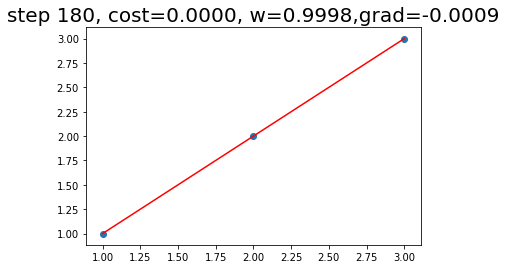

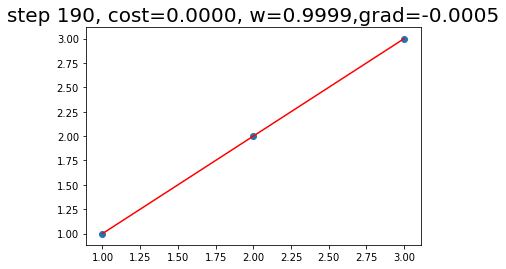

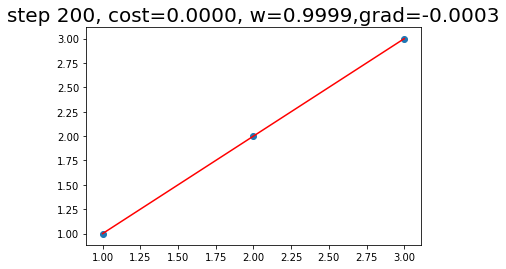

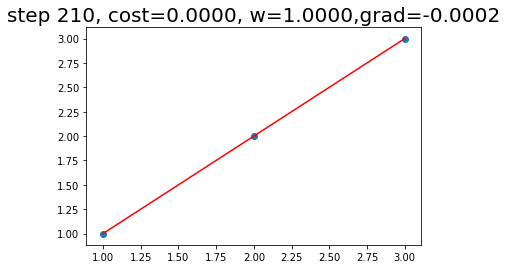

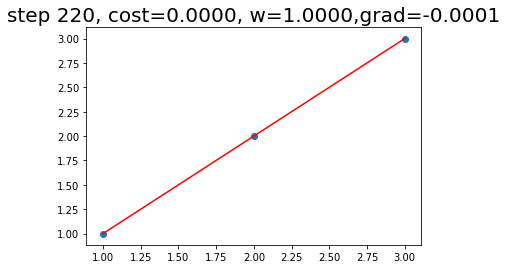

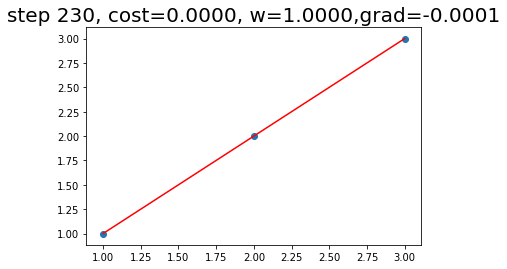

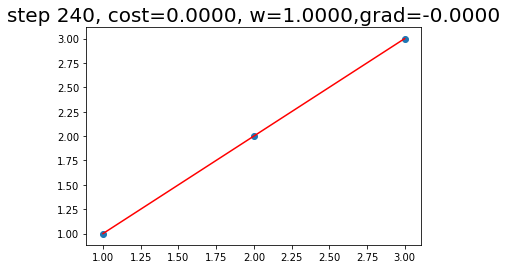

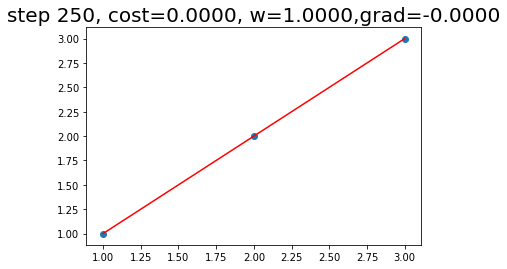

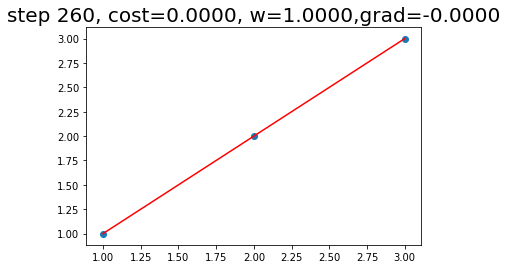

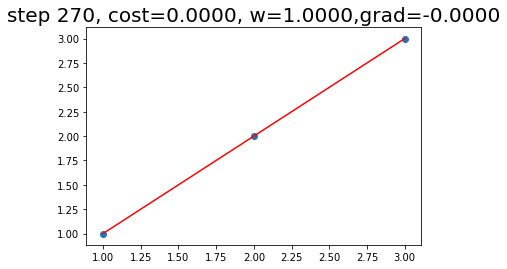

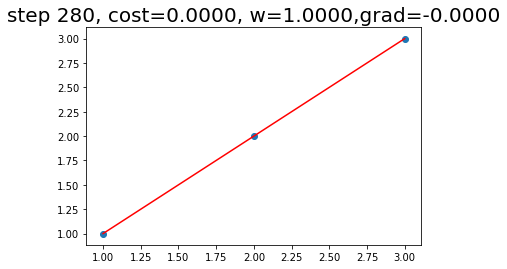

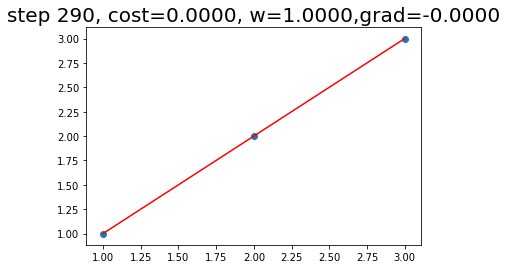

In [7]:
plt.ion()

lr = 0.01

for step in range(300):
    prediction = x.mm(W)
    cost = cost_func(prediction, y)
    gradient = (prediction-y).view(-1).dot(x.view(-1)) / len(x)
    W -= lr * gradient
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f, w=%.4f,grad=%.4f' %  (step, cost.data, W.data, gradient.data), fontdict={'size': 20} )
        plt.show()
        
plt.ioff()

# w/ nn Module

## Define Linear Model

In [8]:
model = nn.Linear(1, 1, bias=True)

model

Linear(in_features=1, out_features=1, bias=True)

In [9]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.7889]], requires_grad=True), Parameter containing:
 tensor([-0.4283], requires_grad=True))

In [10]:
cost_func = nn.MSELoss()

In [11]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[-0.7889]], requires_grad=True)
Parameter containing:
tensor([-0.4283], requires_grad=True)


In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## Training w/ nn module

In [13]:
model(x)

tensor([[-1.2172],
        [-2.0060],
        [-2.7949]], grad_fn=<AddmmBackward>)

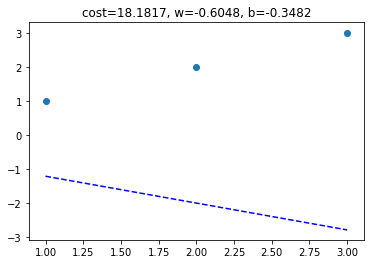

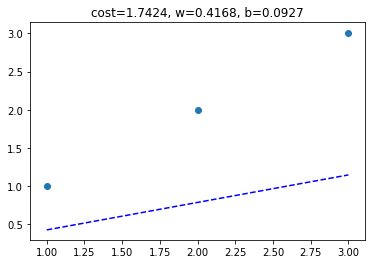

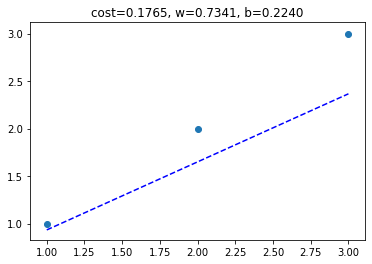

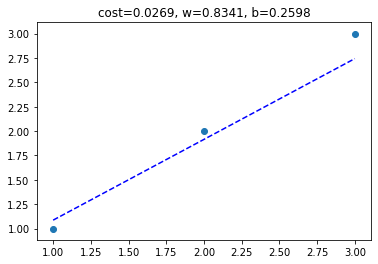

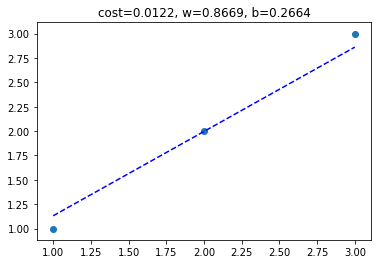

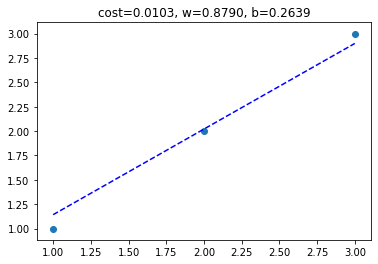

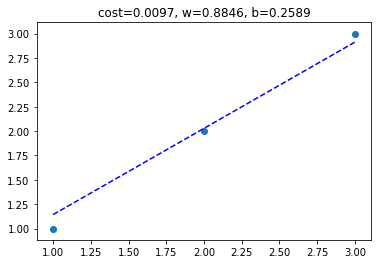

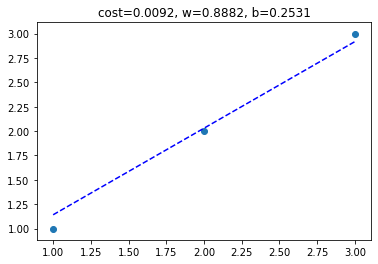

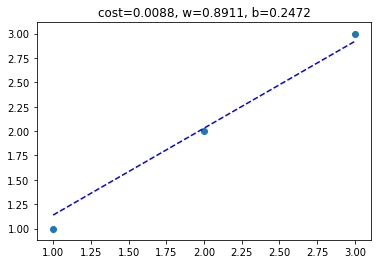

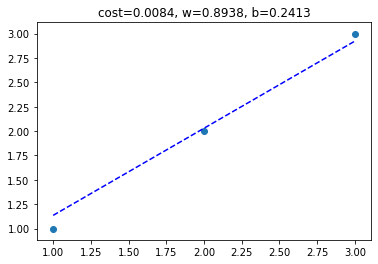

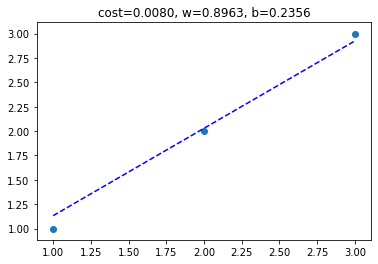

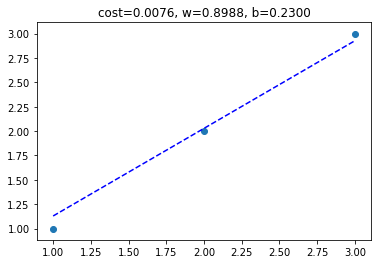

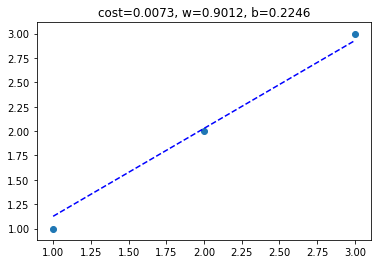

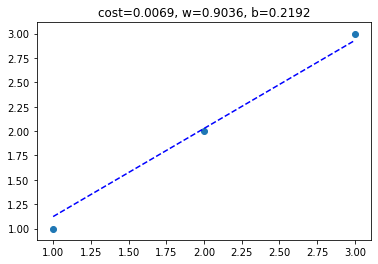

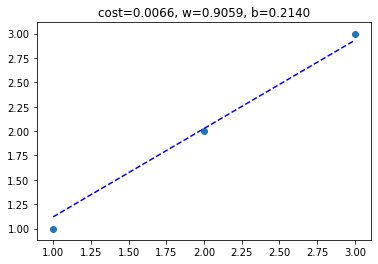

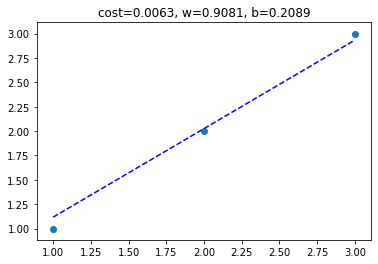

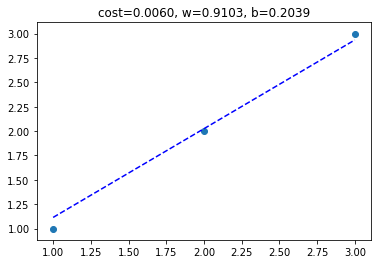

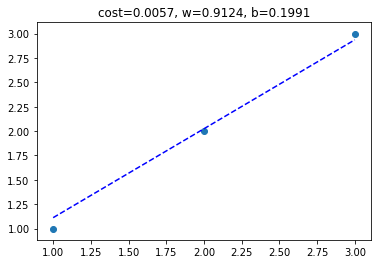

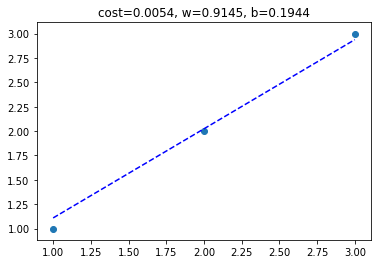

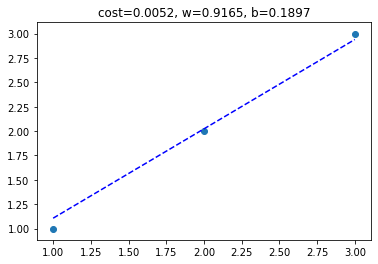

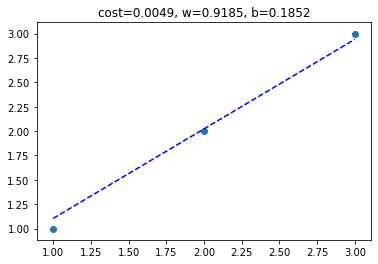

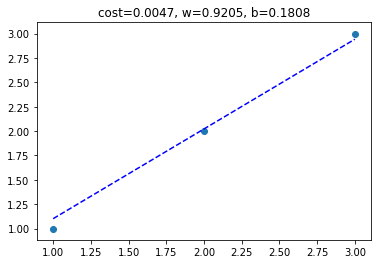

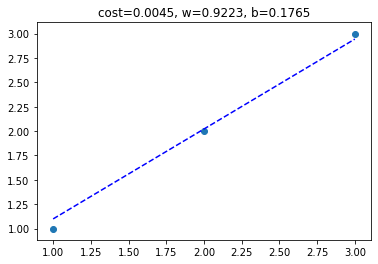

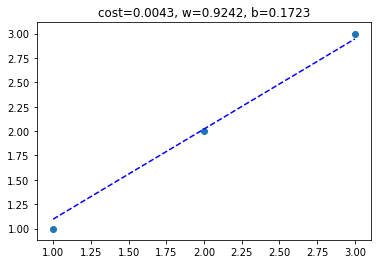

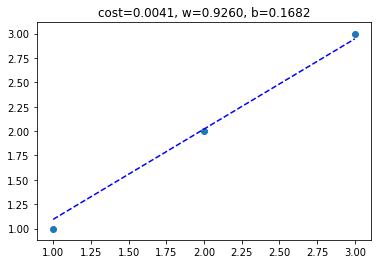

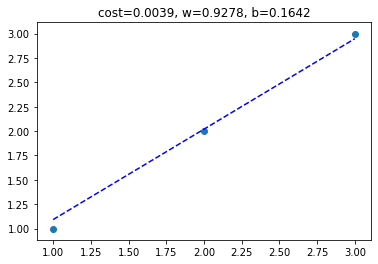

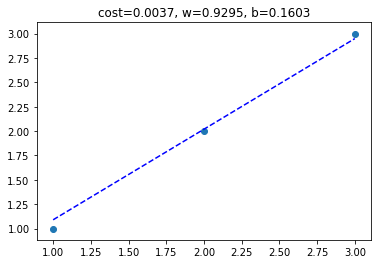

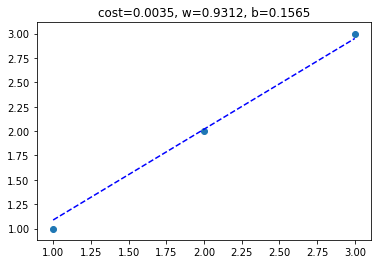

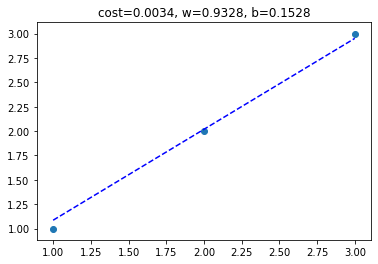

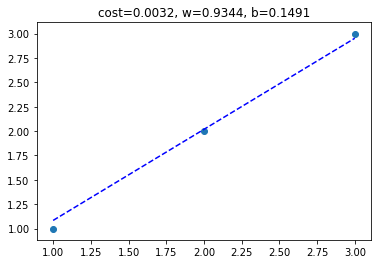

In [14]:
plt.ion()

for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data ,model.weight.data[0] ,model.bias.data[0]))
        plt.show()

plt.ioff()

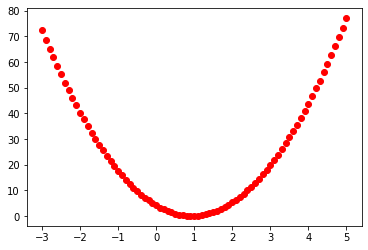

In [16]:
W_val, cost_val = [], []

for i in range(-30, 51):
    W = i * 0.1
    model.weight.data.fill_(W)
    cost =  cost_func(model(x),y)
    
    W_val.append(W)
    cost_val.append(cost.data)

plt.plot(W_val, cost_val, 'ro')
plt.show()

# Multivariate Linear Model

In [17]:
import numpy as np

## Make Data

In [19]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print('shape: ', x_data.shape, '\nlength:', len(x_data), '\n', x_data )
print('shape: ', y_data.shape, '\nlength:', len(y_data), '\n', y_data )

shape:  (25, 3) 
length: 25 
 [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
shape:  (25, 1) 
length: 25 
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [23]:
x=torch.from_numpy(x_data)
y=torch.from_numpy(y_data)

## Make Model

In [26]:
mv_model = nn.Linear(3, 1, bias = True)
mv_model

Linear(in_features=3, out_features=1, bias=True)

In [27]:
print('weight : ', mv_model.weight)
print('bias   : ', mv_model.bias)

weight :  Parameter containing:
tensor([[ 0.3458, -0.4043, -0.1138]], requires_grad=True)
bias   :  Parameter containing:
tensor([-0.5148], requires_grad=True)


In [28]:
cost_func = nn.MSELoss()

optimizer = torch.optim.SGD(mv_model.parameters(), lr=1e-5)

# Training Model

In [29]:
for step in range(2000):
    optimizer.zero_grad()
    
    prediction = mv_model(x)
    cost = cost_func(prediction, y)
    cost.backward()
    
    optimizer.step()
    
    if step % 50 == 0:
        print(step, "Cost: ", cost.data.numpy(), "\nPrediction:\n", prediction.data.t().numpy())

0 Cost:  31851.447 
Prediction:
 [[-16.149149  -14.515271  -16.770224  -18.317513   -9.919674   -7.0429254
  -15.33401   -13.730016  -12.609923  -11.509989  -13.2616    -11.007907
  -17.118025  -13.846668  -14.697635  -15.2609215 -11.601977  -19.473795
  -17.065279  -15.860574  -17.169333  -14.054956  -16.770765  -15.869573
  -15.726996 ]]
50 Cost:  16.355497 
Prediction:
 [[151.61745  187.09262  181.89198  198.06345  143.81245  106.328865
  146.67757  106.43636  175.82738  163.07619  142.79524  142.862
  188.10356  156.71776  148.05635  189.34834  150.80063  174.97774
  178.58548  159.20784  172.80223  175.1046   164.34839  153.22392
  193.21056 ]]
100 Cost:  16.076443 
Prediction:
 [[151.62276  187.06667  181.88123  198.07426  143.76604  106.32563
  146.72826  106.534454 175.82315  163.1192   142.81128  142.8722
  188.06873  156.6543   148.10493  189.3465   150.70274  175.06033
  178.55365  159.18697  172.84901  175.10434  164.3893   153.1745
  193.17805 ]]
150 Cost:  15.805321 
Pred

1700 Cost:  10.286243 
Prediction:
 [[151.84956  186.35057  181.64018  198.36029  142.52132  106.138954
  148.03601  109.062126 175.59496  164.0323   143.21281  143.04224
  187.23822  155.10986  149.33177  189.23482  148.25774  177.20628
  177.82677  158.74336  174.04541  175.03236  165.45709  152.0618
  192.33128 ]]
1750 Cost:  10.175448 
Prediction:
 [[151.85754  186.33157  181.63515  198.36758  142.48917  106.131615
  148.0685   109.124855 175.58617  164.04985  143.22246  143.04404
  187.21938  155.07393  149.36156  189.23036  148.19908  177.26
  177.81117  158.73482  174.07487  175.02885  165.48395  152.0384
  192.31003 ]]
1800 Cost:  10.067613 
Prediction:
 [[151.86554 186.31276 181.63023 198.3748  142.45738 106.12425 148.10057
  109.18677 175.57735 164.06691 143.23196 143.04568 187.20088 155.03857
  149.39091 189.2259  148.14131 177.31303 177.79591 158.72652 174.10393
  175.02531 165.51047 152.01555 192.28905]]
1850 Cost:  9.962674 
Prediction:
 [[151.87354  186.29414  181.62543 

In [30]:
mv_model.state_dict()

OrderedDict([('weight', tensor([[0.7891, 0.3743, 0.8647]])),
             ('bias', tensor([-0.5065]))])

## test

In [32]:
print("Model score : ",mv_model(torch.Tensor([[73,80,75]])))
print("Real score : 73,80,75,152")

Model score :  tensor([[151.8976]], grad_fn=<AddmmBackward>)
Real score : 73,80,75,152


In [33]:
accuracy_list = []
for i,real_y in enumerate(y):
    accuracy = (mv_model((x[1])).data.numpy() - real_y.data.numpy())
    accuracy_list.append(np.absolute(accuracy))

for accuracy in accuracy_list:
    print(accuracy)

print("sum accuracy : ",sum(accuracy_list))
print("avg accuracy : ",sum(accuracy_list)/len(y))

[34.239395]
[1.2393951]
[6.239395]
[9.760605]
[44.239395]
[85.239395]
[37.239395]
[71.239395]
[11.239395]
[22.239395]
[45.239395]
[45.239395]
[2.2393951]
[34.239395]
[38.239395]
[5.760605]
[39.239395]
[3.2393951]
[9.239395]
[27.239395]
[9.239395]
[11.239395]
[11.239395]
[37.239395]
[5.760605]
sum accuracy :  [647.54834]
avg accuracy :  [25.901934]
